In [70]:
import pandas as pd
import yfinance as yf
import numpy as np
from fredapi import Fred
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as scs
plt.style.use('seaborn')
%matplotlib inline

In [71]:
api = 'caf2a437b55be8f56406870c1bed3521'
fred = Fred(api_key= api)

In [72]:
data_realw = pd.DataFrame(fred.get_series(series_id='LEU0252881600A'), columns = ['Real Wages'])
data_realw = (data_realw.pct_change())*100
data_cpi = pd.DataFrame(fred.get_series('FPCPITOTLZGUSA'), columns = ['Annual CPI'])
data_cpi = data_cpi

In [73]:
data_cpi = data_cpi.join(data_realw, how = 'inner')
data_cpi.dropna()

,Annual CPI,Real Wages
1980-01-01,13.549202,-4.216867
1981-01-01,10.334715,-1.886792
1982-01-01,6.131427,0.320513
1983-01-01,3.212435,0.319489
1984-01-01,4.300535,0.000000
1985-01-01,3.545644,1.910828
1986-01-01,1.898048,2.187500
1987-01-01,3.664563,0.611621
1988-01-01,4.077741,-0.911854
1989-01-01,4.827003,-1.226994


In [74]:
data_cpi.describe()

,Annual CPI,Real Wages
count,43.000000,42.000000
mean,3.399358,0.259993
std,2.658440,1.732967
min,-0.355546,-4.216867
25%,1.983692,-0.622440
50%,2.852672,0.309895
75%,3.751832,1.103407
max,13.549202,5.849582


<AxesSubplot:>

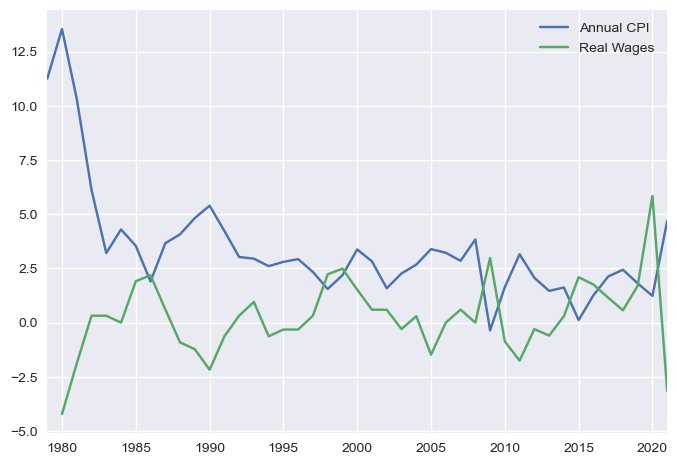

In [75]:
data_cpi.plot()

<AxesSubplot:title={'center':'Rolling 10 Year Correlation Between CPI and Real Wages'}>

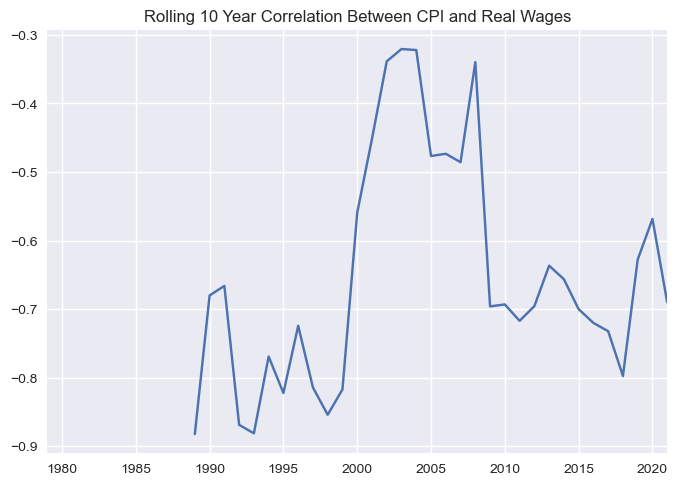

In [76]:
(data_cpi['Annual CPI'].rolling(10).corr(data_cpi['Real Wages'])).plot(title='Rolling 10 Year Correlation Between CPI and Real Wages')